<a href="https://colab.research.google.com/github/egafdharmawan/Pacman/blob/main/Pacman_Data_Preprocessing_SQL_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style(style="white")
sns.set(rc={'figure.figsize':(14,8)})

## Data Cleansing

### Customer Dataset

In [ ]:
customer = pd.read_csv('https://raw.githubusercontent.com/egafdharmawan/Dataset/main/Olist%20Dataset/olist_customers_dataset.csv')
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
customer.drop(columns=['customer_unique_id','customer_zip_code_prefix'], inplace=True)
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     99441 non-null  object
 1   customer_city   99441 non-null  object
 2   customer_state  99441 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB


### Order Dataset

In [ ]:
order = pd.read_csv('https://raw.githubusercontent.com/egafdharmawan/Dataset/main/Olist%20Dataset/olist_orders_dataset.csv')
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
# Drop Unnecessary Columns
order.drop(columns=['order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date'], inplace=True)
# Change Data Types on Date Column
order['order_purchase_timestamp'] = pd.to_datetime(order['order_purchase_timestamp']).dt.normalize()
# Filter to only delivered order
order = order[order['order_status'] == 'delivered']

In [ ]:
order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96478 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  96478 non-null  object        
 1   customer_id               96478 non-null  object        
 2   order_status              96478 non-null  object        
 3   order_purchase_timestamp  96478 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 3.7+ MB


In [ ]:
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13


### Order Items Dataset

In [ ]:
order_items = pd.read_csv('https://raw.githubusercontent.com/egafdharmawan/Dataset/main/Olist%20Dataset/olist_order_items_dataset.csv')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
# Create total prices column
order_items['total_prices'] = order_items['price']+order_items['freight_value']
# Drop Unnecessary Columns
order_items.drop(columns=['order_item_id','product_id','seller_id','price','freight_value'], inplace=True)
# Groupby order id and sum all total prices in the same order id
order_items = order_items.groupby('order_id', as_index=False)['total_prices'].sum()

In [ ]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98666 entries, 0 to 98665
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      98666 non-null  object 
 1   total_prices  98666 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.5+ MB


## Data Wrangling

### Join All Dataset

In [ ]:
data = pd.merge(order, customer, how="left", on="customer_id")
data = pd.merge(data, order_items, how='left', on="order_id")

In [ ]:
# Create Time Series Columns
data['Year'] = pd.DatetimeIndex(data['order_purchase_timestamp']).year.astype(str)
data['Month'] = pd.DatetimeIndex(data['order_purchase_timestamp']).month.astype(str)
data['Year-Month'] = data['Year'].str[-2:] + '-' + data['Month'].str.zfill(2)

data['Weekdays'] = pd.DatetimeIndex(data['order_purchase_timestamp']).dayofweek

In [ ]:
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,customer_city,customer_state,total_prices,Year,Month,Year-Month,Weekdays
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,sao paulo,SP,38.71,2017,10,17-10,0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,barreiras,BA,141.46,2018,7,18-07,1
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,vianopolis,GO,179.12,2018,8,18-08,2
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,sao goncalo do amarante,RN,72.20,2017,11,17-11,5
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,santo andre,SP,28.62,2018,2,18-02,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96478 entries, 0 to 96477
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  96478 non-null  object        
 1   customer_id               96478 non-null  object        
 2   order_status              96478 non-null  object        
 3   order_purchase_timestamp  96478 non-null  datetime64[ns]
 4   customer_city             96478 non-null  object        
 5   customer_state            96478 non-null  object        
 6   total_prices              96478 non-null  float64       
 7   Year                      96478 non-null  object        
 8   Month                     96478 non-null  object        
 9   Year-Month                96478 non-null  object        
 10  Weekdays                  96478 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 8.8+ MB


## Data Preprocess

### Outlier Detection

<AxesSubplot: xlabel='total_prices', ylabel='Count'>

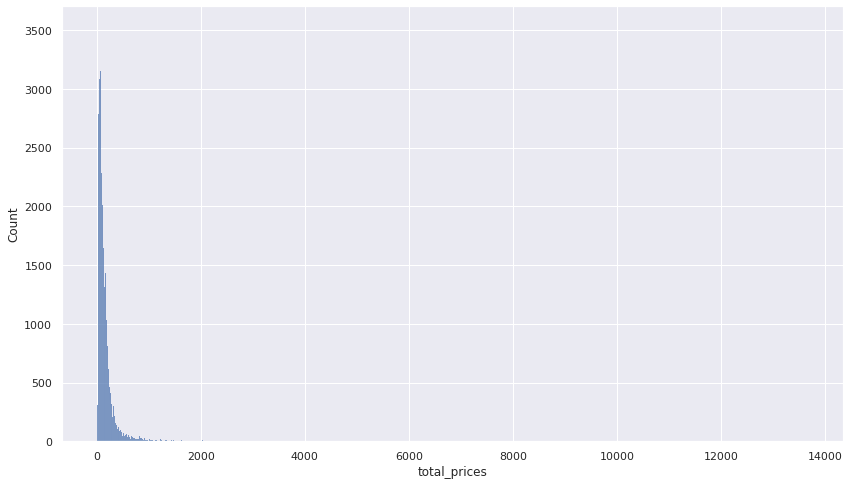

In [ ]:
sns.histplot(data=data, x="total_prices")

<AxesSubplot: xlabel='total_prices'>

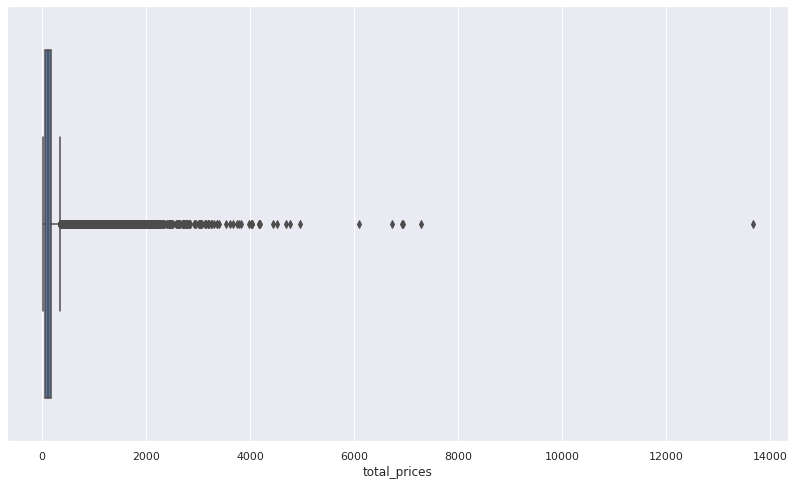

In [ ]:
sns.boxplot(x=data["total_prices"])

<AxesSubplot: xlabel='total_prices', ylabel='customer_state'>

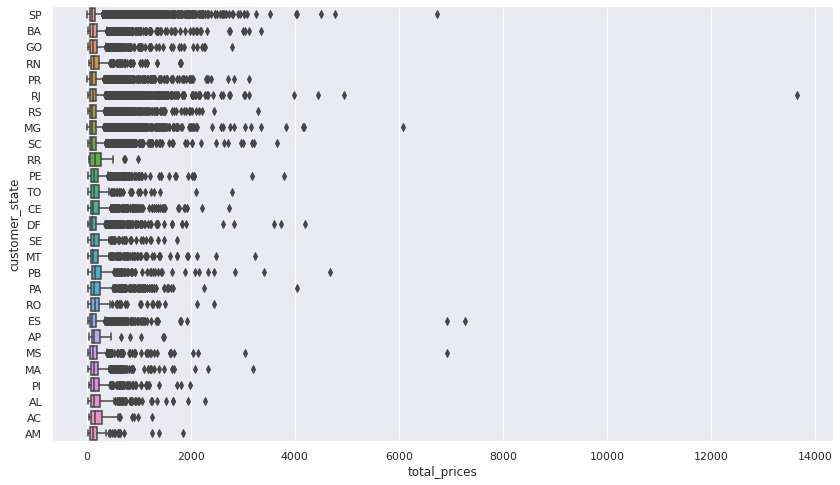

In [ ]:
sns.boxplot(x=data["total_prices"], y=data["customer_state"])

In [ ]:
z_score = []
mean = np.mean(data['total_prices'])
std = np.std(data['total_prices'])
for x in data['total_prices']:
  z = (x-mean) / std
  z_score.append(z)

In [ ]:
data['z_score'] = z_score
z_upper = data['z_score'] > 2
z_lower = data['z_score'] < -2

data['z_out'] = np.where(z_upper | z_lower, 'Outlier', 'Non Outlier')

In [ ]:
med = np.median(data['total_prices'])
data['total_prices'] = np.where(data['z_out'] == 'Outlier', med, data['total_prices'])

<AxesSubplot: xlabel='total_prices', ylabel='Count'>

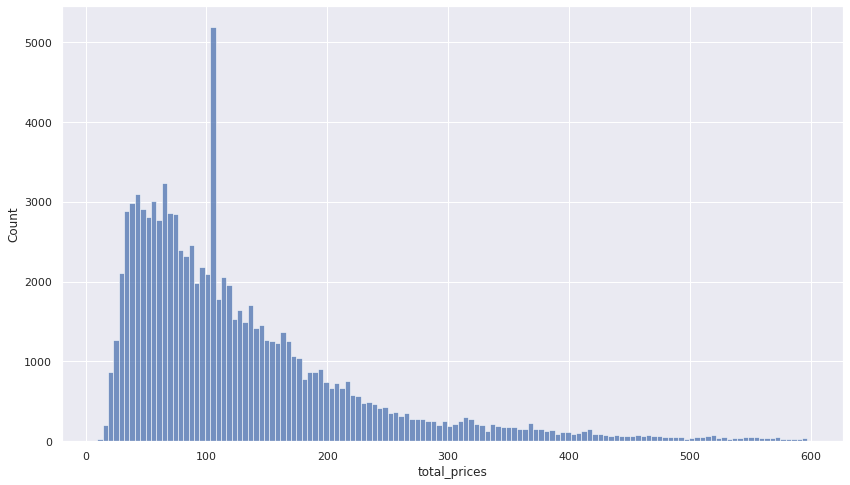

In [ ]:
sns.histplot(data=data, x="total_prices")

In [ ]:
data.drop(columns=['z_score','z_out','order_status'], inplace=True)

# EDA

<AxesSubplot: xlabel='customer_city'>

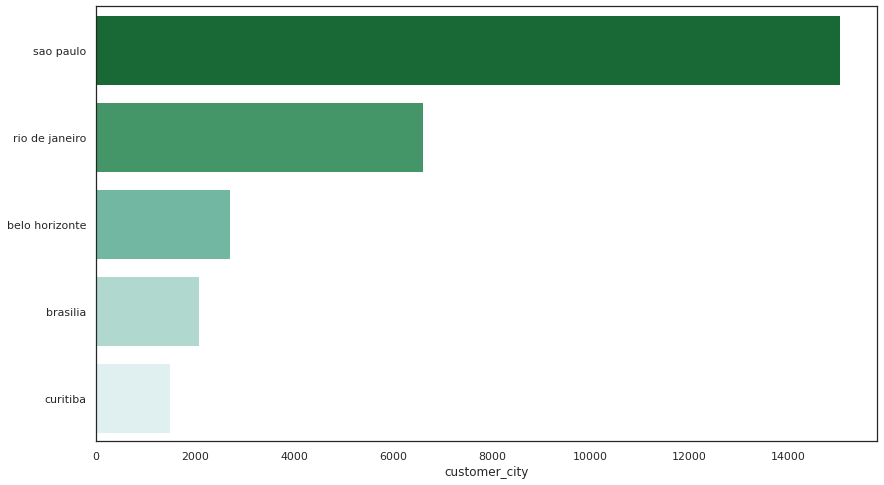

In [ ]:
# Top 5 City with most sales in QTY
X = data.customer_city.value_counts().head()

sns.set_style("white")
sns.barplot(x=X, y=X.index, data=data, palette='BuGn_r')

<AxesSubplot: xlabel='total_prices', ylabel='customer_state'>

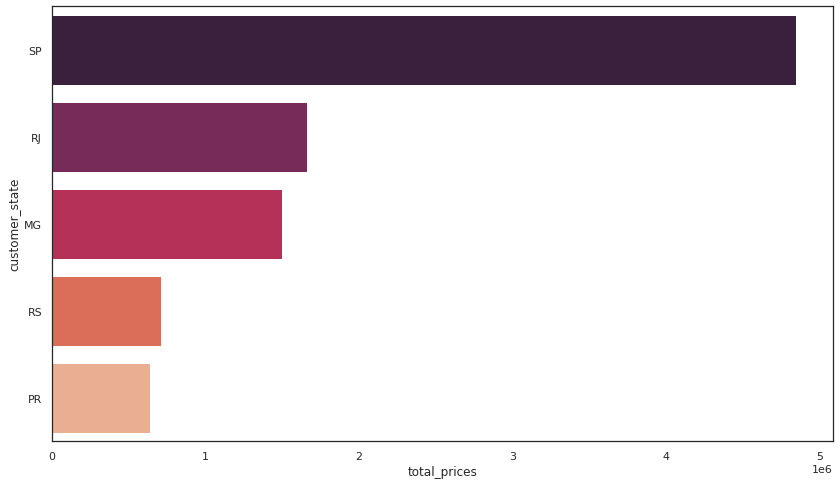

In [ ]:
# Top 5 City with highest sales
X = data.groupby('customer_state')['total_prices'].sum().nlargest(5)

sns.barplot(x=X, y=X.index, data=data, palette='rocket')

[Text(0, 0, '36311.1'), Text(0, 0, '5.56177e+06'), Text(0, 0, '6.90896e+06')]

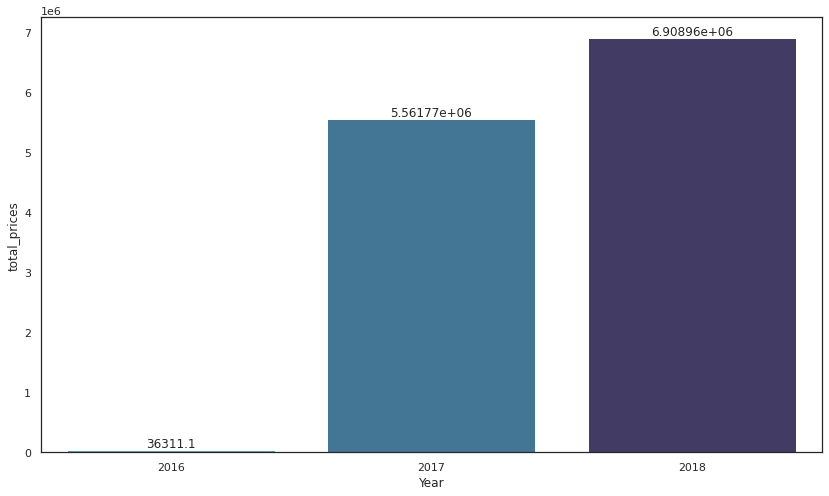

In [ ]:
# Sales Growth in Year
X = data.groupby('Year')['total_prices'].sum()

ax = sns.barplot(x=X.index, y=X, palette='mako_r')
ax.bar_label(ax.containers[0])

<ipython-input-108-61d3e35a68c5>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=X.index, y=X, palette='mako_r')


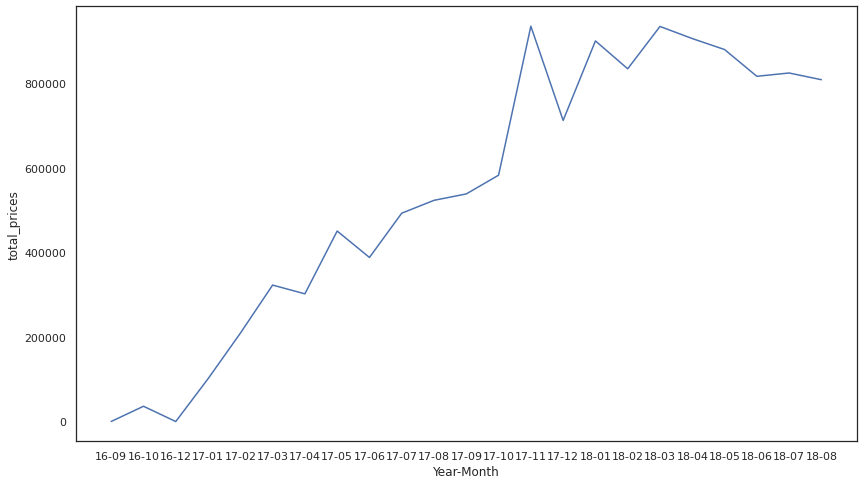

In [ ]:
# Sales Growth in Month
X = data.groupby('Year-Month')['total_prices'].sum()

ax = sns.lineplot(x=X.index, y=X, palette='mako_r')

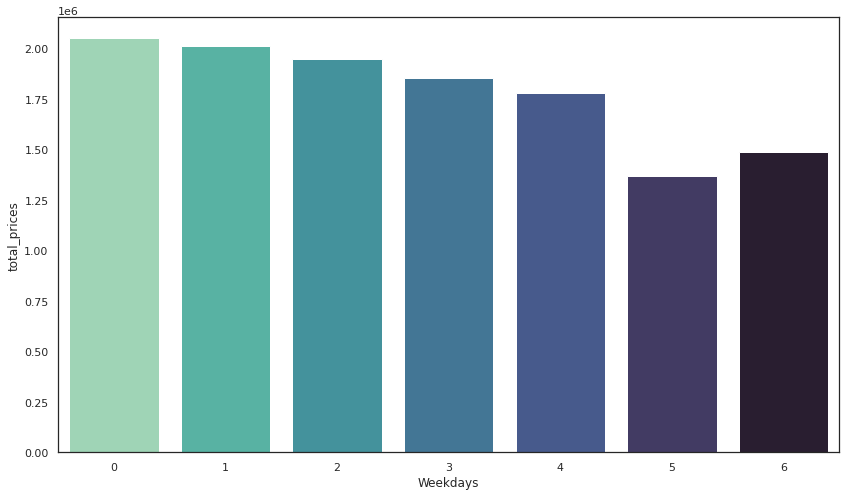

In [ ]:
# Sales pattern in weekdays
X = data.groupby('Weekdays')['total_prices'].sum()

ax = sns.barplot(x=X.index, y=X, palette='mako_r')